In [132]:
#coding: utf-8

import warnings
warnings.simplefilter("ignore")

import os
import sys 
import wave
import time
import librosa
import numpy as np
import seaborn as sns
from utils import *
import matplotlib.pyplot as plt
from StringIO import StringIO
import pandas as pd

%pylab inline

# sudo pip install librosa
# ubuntu: sudo apt-get install libav-tools
# OSX   : brew install libav OMP_NUM_THREADS=2

Populating the interactive namespace from numpy and matplotlib


# Get the Data

Датасет для контеста помещен вот здесь: https://yadi.sk/d/3jmeVCfSwTKgm (внимание! файл весит 3,5 Гб)


Он распаковывается в папку "musicdata". Все пути в этом ноутбуке будут относительно этой папки: "./musicdata/\*". 

Вы можете изменить базовый путь, как вам удобно.

In [1]:
!wget "https://s31h.storage.yandex.net/rdisk/9dbd0d5aa242a0f68c3f407483308115fefd9d319de006758d7f1d742e878a03/58080644/yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5/xxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-compressed&fsize=4065161358&hid=7ca9dbf910adbf3e058f5268436382af&media_type=compressed&tknv=v2&rtoken=qClEFFR0xpzW&force_default=no&ycrid=na-8f51c7aa7857b0f18c729299ec9033df-downloader6h&ts=53f40719b1900&s=b7ebedd988f6f129544db6562b861044e6ddd37b8c32f769a8d2913a078227dc&bp=/24/5/data-0.4:19091029535:4065161358"

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
The name is too long, 553 chars total.
Trying to shorten...
New name is yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5%2FxxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-.
The name is too long, 553 chars total.
Trying to shorten...
New name is yMOILvwUQRQmX_gy9wRrt4xY325hpMBgBUt4mljIj-lL855134MRqs435rEZGxdbZ422iAZPKFAtbDudrN2hkA==?uid=0&filename=musicdata.zip&disposition=attachment&hash=ZtU5OB5%2FxxlTo52rmljdoNvRP4c8yetA0CltSqFsWOk%3D&limit=0&content_type=application%2Fx-zip-.
--2016-10-19 20:28:56--  https://s31h.storage.yandex.net/rdisk/9dbd0d5aa242a0f68c3f407483308115fefd9d319de006758d7f1d742e878a03/58080644/yMOILvwUQRQmX_gy9wRrt4xY

In [9]:
!unzip "musicdata.zip"

Archive:  musicdata.zip
   creating: audiosamples/
  inflating: audiosamples/short_206024.wav  
  inflating: audiosamples/short_206377.wav  
  inflating: audiosamples/short_206447.wav  
  inflating: audiosamples/short_206626.wav  
  inflating: audiosamples/short_206771.wav  
  inflating: audiosamples/short_206941.wav  
   creating: spectrograms/
  inflating: spectrograms/spectrograms1.pcl  
  inflating: spectrograms/spectrograms2.pcl  
  inflating: spectrograms/spectrograms3.pcl  
  inflating: spectrograms/spectrograms4.pcl  
  inflating: spectrograms/spectrograms5.pcl  
  inflating: spectrograms/spectrograms6.pcl  
  inflating: spectrograms/spectrograms7.pcl  
  inflating: train_genres.txt        


In [3]:
BP = "./"

# Just a Sound

Для начала попробуем поработать со звуком - послушайте любой трек, постройте график сырых данных и спектрограмму.

In [3]:
import IPython
from IPython.display import HTML

def Audio(url):
    return HTML("<center><audio controls><source src='{}' type=\"audio/wav\"></audio>".format(url))

In [4]:
sound_file = os.path.join(BP, "audiosamples", "short_206377.wav")
y, sr = librosa.load(sound_file)

Audio(url=sound_file)

# Sound as 1D-Signal

In [23]:
len(y) / sr

10

In [24]:
from scipy.io import wavfile as wav
rate, data = wav.read(sound_file)

In [25]:
len(data)/rate

10

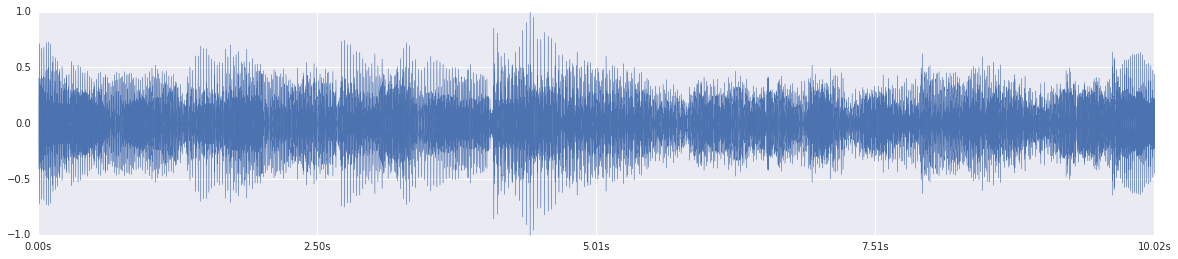

In [26]:
plt.figure(figsize=(20,4))
librosa.display.waveplot(y, sr=sr)

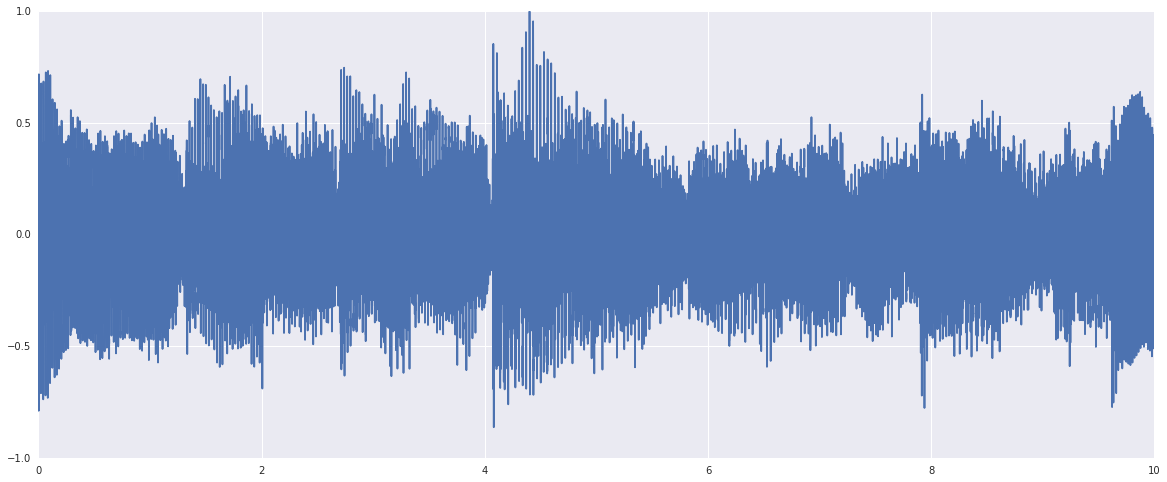

In [29]:
plt.figure(figsize=(20,8))
# 
# Используйте pylab.plot для построения графика, нарисуйте y, sr
#
x = np.arange(0, 10, 1./sr)
pylab.plot(x, y)
pylab.xlim([0, 10])
pylab.show()

# Sound as 2D-Signal

Нашу цель слелать из предыдущего графика картинку - для этого нам нужно оценить частоты в каждый момент времени. Благо за нас это умеет делать librosa, у которой внутри STFFT. Используйте librosa.feature.melspectrogram -- для получения спектрограммы, и librosa.logamplitude для выравнивания диапазонов частот. 

help: https://gist.github.com/mailletf/3484932dd29d62b36092

In [30]:
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
log_S = librosa.logamplitude(S, ref_power=np.max)

In [31]:
y.shape

(220500,)

Нарисуйте спектрограмму, получилась красивая картинка?

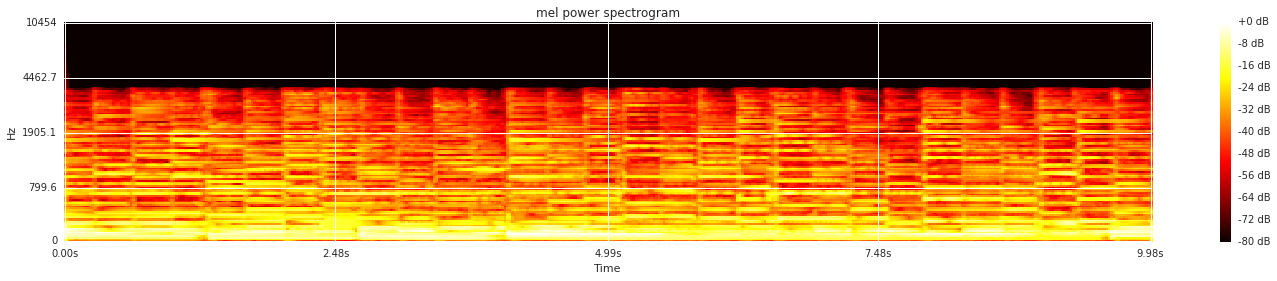

In [32]:
plt.figure(figsize=(20,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='hot')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Prepare the Data

В этой секции мы создадим датасет, прочитав все данные.

In [4]:
import numpy as np
X = []
for i in xrange(1, 7):
    X.append(np.load(os.path.join(BP, "spectrograms", "spectrograms" + str(i) + ".pcl")))

In [5]:
X = np.concatenate(X)

In [7]:
X.shape

(12000, 128, 431)

Здесь вы должны получить train genres. Они идут подряд в соответствии с последовательностью треков в файлах с данными. Для содержимого первых шести файлов у вас есть жанры, а для последнего файла, вам их нужно предсказать.

In [61]:
train_genres = []
with open(os.path.join(BP, "train_genres.txt"), "rt") as f_in:
    for line in f_in.readlines():
        train_genres.append(line.split("\n")[0])
print len(train_genres)

12000


In [129]:
classes = list(set(train_genres))
num_classes = len(classes)
d = {classes[i]: i for i in range(num_classes)}
genres = {i: classes[i] for i in range(num_classes)}
y = np.array([int(d[x]) for x in train_genres])

# Nearest Neighbors genre classification

Let's try to solve similarity task by the nearest neighbour approach.

<img src="./img/nn.png" width="300">

Перемешаем датасет - используйте `np.random.permutation` и индексацию `a[np.random.permutation]`.

In [11]:
perm = np.random.permutation(y.shape[0])
y = y[perm]
X = X[perm]
Xreshape = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

Разобьем датасет на трейн и валидацию 80/20%.

In [12]:
X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

Попробуем поклассифицировать жанры методом ближайших соседей.

In [13]:
X_train.shape

(10000, 55168)

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_jobs=15)
clf = clf.fit(X_train, y_train)
y_val_pred = clf.predict(X_valid.reshape((X_valid.shape[0], -1)))

print accuracy_score(y_valid, y_val_pred)

0.1155


# Fully-Connected Neural Nets

Использовать нейросети - это хорошая идея, давайте начнем с полносвязных сетей.

In [9]:
import theano
import lasagne
import theano.tensor as T

from utils import train_net

Перемешаем и разобьем датасет.

In [65]:
perm = np.random.permutation(y.shape[0])
X, y = np.array(X)[perm].astype('float32'), np.array(y)[perm]
Xreshape = X.reshape(X.shape[0], 1, X.shape[1], X.shape[2])

X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

In [83]:
input_X, target_y = T.tensor4("X", dtype='float32'), T.vector("y", dtype='int32')
nn = lasagne.layers.InputLayer(shape=(None, 1, X.shape[1], X.shape[2]), input_var=input_X) 
#
# Используйте 2-3 больших полносвязных слоя, обучилась ли сеть? если нет то почему?
#

nn0 = lasagne.layers.DenseLayer(nn,100, name='conv0')
nn2 = lasagne.layers.DenseLayer(nn0,num_classes, name='conv2')

y_predicted = lasagne.layers.get_output(nn2)
all_weights = lasagne.layers.get_all_params(nn2)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.sgd(loss, all_weights, 0.001)

In [84]:
train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [85]:
%time conv_nn = train_net(nn, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=10, batch_size=50)

Epoch   1 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   2 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   3 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   4 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   5 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   6 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   7 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   8 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch   9 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
Epoch  10 of  10 train_loss = nan val_loss = nan train_acc = 0.12 val_acc = 0.05
CPU times: user 14min 19s, sys: 56min 26s, total: 1h 10min 46s
Wall time: 5min


# Convolution Neural Nets

Да, вероятно, полносвязные сети не зажгли и kNN не обогнали. Давайте попробуем сверточные, хороший вариант делать одномерные свертки (сразу по всем частотам). Хотя двумерные тоже могут работать. 

Архитектуру можно подсмотреть [тут](http://benanne.github.io/2014/08/05/spotify-cnns.html).

In [43]:
import theano
import lasagne
import theano.tensor as T

from utils import train_net

In [90]:
perm = np.random.permutation(len(y))
X, y = np.array(X)[perm].astype('float32'), np.array(y)[perm]
Xreshape = X.reshape(X.shape[0], X.shape[1], X.shape[2])

X_train, X_valid = Xreshape[:10000], Xreshape[10000:]
y_train, y_valid = y[:10000], y[10000:]

In [91]:
input_X, target_y = T.tensor3("X", dtype='float64'), T.vector("y", dtype='int32')
nn = lasagne.layers.InputLayer(shape=(None, X.shape[1], X.shape[2]), input_var=input_X) 

# Сделайте свою сеть, используя: Conv1DLayer + MaxPool1DLayer + DenseLayer
    
nn = lasagne.layers.Conv1DLayer(nn,16,filter_size=(8),stride=(4),name='conv')

nn = lasagne.layers.MaxPool1DLayer(nn, 10, name='pool')

nn = lasagne.layers.DenseLayer(nn, 32, nonlinearity=lasagne.nonlinearities.tanh)

nn = lasagne.layers.DenseLayer(nn, num_classes, nonlinearity=lasagne.nonlinearities.softmax)

In [92]:
y_predicted = lasagne.layers.get_output(nn)
all_weights = lasagne.layers.get_all_params(nn)

loss = lasagne.objectives.categorical_crossentropy(y_predicted, target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted, target_y).mean()
updates_sgd = lasagne.updates.adam(loss, all_weights)

In [93]:
train_fun = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True, updates=updates_sgd)
test_fun  = theano.function([input_X, target_y], [loss, accuracy], allow_input_downcast=True)

In [94]:
%time conv_nn = train_net(nn, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=10, batch_size=50)

Epoch   1 of  10 train_loss = 2.97 val_loss = 2.67 train_acc = 28.47 val_acc = 35.60
Epoch   2 of  10 train_loss = 2.66 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   3 of  10 train_loss = 2.66 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   4 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   5 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   6 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   7 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   8 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch   9 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
Epoch  10 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 34.92 val_acc = 35.60
CPU times: user 2min 31s, sys: 0 ns, total: 2min 31s
Wall time: 2min 30s


In [50]:
# Подумайте, какой размер батча нужен и сколько эпох вы можете себе позволить подождать
%time conv_nn = train_net(nn, train_fun, test_fun, X_train, y_train, X_valid, y_valid, num_epochs=10, batch_size=50)

Epoch   1 of  10 train_loss = 2.97 val_loss = 2.67 train_acc = 31.04 val_acc = 35.05
Epoch   2 of  10 train_loss = 2.66 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   3 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   4 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   5 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   6 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   7 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   8 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch   9 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
Epoch  10 of  10 train_loss = 2.65 val_loss = 2.66 train_acc = 35.03 val_acc = 35.05
CPU times: user 2min 28s, sys: 6.57 ms, total: 2min 29s
Wall time: 2min 29s


Валидационная точность должна быть около 0.6 или лучше. 

Давайте нарисуем каждый второй фильтр - можете ли вы проинтерпретировать эти фильтры?

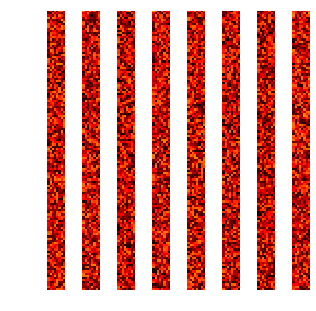

In [51]:
plt.figure(figsize=(5, 5), dpi=500)
W = lasagne.layers.get_all_params(nn)[0].get_value()
W[::2, :, :] = 0.2
W = np.hstack(W)
pylab.imshow(W, cmap='hot', interpolation="nearest")
pylab.axis('off')
pylab.show()

# Maps of tracks by SVD and tSNE

Хорошая идея посмотреть, как полученое представление отображается с сохранением относительных расстояний на плоскость. Используйте tSNE или PCA.

Help: https://lts2.epfl.ch/blog/perekres/category/visualizing-hidden-structures-in-datasets-using-deep-learning/

In [52]:
from sklearn.manifold import TSNE

In [53]:
represent = lasagne.layers.get_output(nn.input_layer)
represent_fun = theano.function([input_X], [represent], allow_input_downcast=True)

In [54]:
f = lambda x: np.array(represent_fun([x])[0])
track_vectors = map(f, X_train) + map(f, X_valid)
track_vectors = np.concatenate(track_vectors, axis=0)

track_labels = np.array(list(y_train) + list(y_valid))

получите 2d вектора

In [ ]:
X_tsne = ????

нарисуйте получившиеся точки

In [ ]:
plt.figure(figsize=(10,10), dpi=500)
colors = cm.hot(np.linspace(0, 1, len(id2gener)))

for idx, gener in id2gener.items():
    idx_ = np.where(track_labels == idx)
    pylab.scatter(????, ????, c=colors[idx], cmap=cm.hot, label=gener,s=50)

pylab.legend(loc=0, ncol=5)

### Тестовая выборка

In [59]:
X_test = np.load(os.path.join(BP, "spectrograms", "spectrograms7.pcl"))

In [60]:
X_test.shape

(2000, 128, 431)

In [125]:
test_prediction = lasagne.layers.get_output(nn, deterministic=True)
predict_fn = theano.function([input_X], [test_prediction])
y_pred = np.array(predict_fn(X_test)).reshape(X_test.shape[0], num_classes)
y_pred = [np.argmax(i) for i in y_pred]

# np.savetxt('submission.csv', subm, fmt='%d', delimiter=',',header='ImageId,Label', comments='')

In [131]:
res = pd.DataFrame(y_pred, columns=['Category'], index=range(12000,14000))
res.Category = res.Category.apply(lambda x : genres[x])
res.to_csv('pred1.csv', index_label='Id')

NameError: name 'pd' is not defined

In [130]:
genres

{0: 'spiritual',
 1: 'industrial',
 2: 'classical',
 3: 'urban',
 4: 'dance',
 5: 'rusrap',
 6: 'modern',
 7: 'pop',
 8: 'dubstep',
 9: 'bard',
 10: 'rap',
 11: 'meditation',
 12: 'sport',
 13: 'conjazz',
 14: 'alternative',
 15: 'folk',
 16: 'tradjazz',
 17: 'blues',
 18: 'dnb',
 19: 'trance',
 20: 'dub',
 21: 'eastern',
 22: 'children',
 23: 'lounge',
 24: 'indie',
 25: 'other',
 26: 'ska',
 27: 'eurofolk',
 28: 'house',
 29: 'prog',
 30: 'electronics',
 31: 'holiday',
 32: 'newage',
 33: 'spoken',
 34: 'reggae',
 35: 'reggaeton',
 36: 'estrada',
 37: 'relax',
 38: 'jewish',
 39: 'rnb',
 40: 'jazz',
 41: 'metal',
 42: 'ukrrock',
 43: 'soundtrack',
 44: 'amerfolk',
 45: 'shanson',
 46: 'african',
 47: 'rusfolk',
 48: 'rnr',
 49: 'hardcore',
 50: 'musical',
 51: 'bollywood',
 52: 'rusrock',
 53: 'funk',
 54: 'celtic',
 55: 'country',
 56: 'punk',
 57: 'soul',
 58: 'vocal',
 59: 'disco',
 60: 'techno',
 61: 'experimental',
 62: 'rock',
 63: 'asiapop',
 64: 'newwave',
 65: 'latinfolk',
 